<a href="https://colab.research.google.com/github/shubavarma/DeepLearning/blob/main/Boston_housePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import tensorflow.keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from mlxtend.plotting import plot_decision_regions

In [ ]:
from tensorflow.keras.datasets import boston_housing

In [ ]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(404, 13)

In [ ]:
y_train.shape

(404,)

In [ ]:
x_train[2][2]

18.1

In [ ]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [ ]:
x_train[2][2]

1.0283257954396188

In [ ]:
model=Sequential()
model.add(Dense(4,activation="sigmoid",input_dim=13))
model.add(Dense(3,activation="sigmoid"))
model.add(Dense(1,activation="linear"))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 4)                 56        
                                                                 
 dense_17 (Dense)            (None, 3)                 15        
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


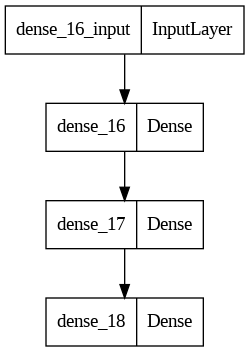

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
model.layers[0].get_weights()

[array([[ 0.01692319,  0.3838331 ,  0.1403616 , -0.05415374],
        [-0.4486341 ,  0.18204945, -0.48645994,  0.29374003],
        [ 0.24783045,  0.12357873,  0.47004676, -0.10473219],
        [ 0.26425844, -0.20650262, -0.21280965,  0.5874233 ],
        [-0.37681168,  0.07842803,  0.224006  , -0.562256  ],
        [-0.05532897,  0.08610189,  0.5496111 , -0.4873166 ],
        [-0.43896788,  0.21035469, -0.34884876,  0.0488109 ],
        [-0.52499205, -0.30713525,  0.270752  ,  0.29431003],
        [ 0.5816586 , -0.40377474, -0.13117811,  0.05909461],
        [-0.46596426,  0.5326576 ,  0.04994017,  0.14476705],
        [ 0.34514552, -0.13135898,  0.5286883 ,  0.4630655 ],
        [-0.5842385 , -0.4527138 ,  0.11239839,  0.46713233],
        [ 0.44363713,  0.02962565,  0.44093955, -0.07096791]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

In [ ]:
model.compile(optimizer="sgd",loss="huber",metrics=["mae"])

In [ ]:
history = model.fit(x_train,y_train,batch_size=1,epochs=50,validation_split=0.2)

Epoch 1/50
323/323 [==============================] - 1s 2ms/step - loss: 3.9144 - mae: 4.3713 - val_loss: 4.3769 - val_mae: 4.8301
Epoch 2/50
323/323 [==============================] - 1s 2ms/step - loss: 3.7250 - mae: 4.1725 - val_loss: 4.2228 - val_mae: 4.6641
Epoch 3/50
323/323 [==============================] - 1s 2ms/step - loss: 3.5585 - mae: 4.0057 - val_loss: 3.9228 - val_mae: 4.3652
Epoch 4/50
323/323 [==============================] - 1s 2ms/step - loss: 3.4470 - mae: 3.8947 - val_loss: 3.8451 - val_mae: 4.2955
Epoch 5/50
323/323 [==============================] - 1s 2ms/step - loss: 3.2970 - mae: 3.7531 - val_loss: 3.6938 - val_mae: 4.1566
Epoch 6/50
323/323 [==============================] - 1s 2ms/step - loss: 3.2214 - mae: 3.6638 - val_loss: 3.4903 - val_mae: 3.9580
Epoch 7/50
323/323 [==============================] - 1s 2ms/step - loss: 3.1356 - mae: 3.5830 - val_loss: 3.4180 - val_mae: 3.8785
Epoch 8/50
323/323 [==============================] - 1s 2ms/step - loss: 3.

In [ ]:
predict = model.predict(x_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
r2_score(y_test,predict)

0.804541784677817

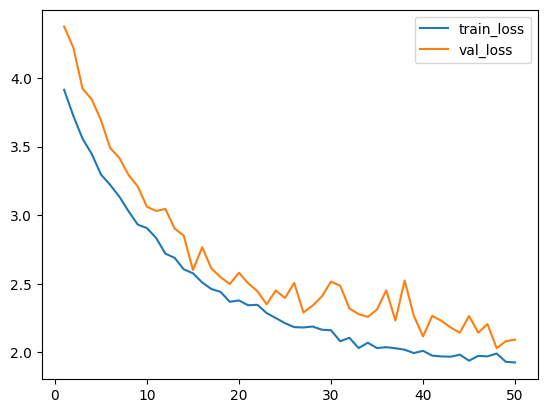

In [ ]:
plt.plot(range(1,51),history.history["loss"],label="train_loss")
plt.plot(range(1,51),history.history["val_loss"],label="val_loss")
plt.legend()